# Baseball Databank

Site: https://www.seanlahman.com/baseball-archive/statistics/

Documentation: https://www.seanlahman.com/files/database/readme2021.txt

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cpi

In [5]:
salaries = pd.read_csv("data/original_data/salaries.csv")

In [6]:
salaries

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


In [7]:
salaries["adj_salary"] = [cpi.inflate(salary, year, to=2016) for salary, year in zip(salaries.salary, salaries.yearID)]

In [8]:
# plot salary mean by year
mean_salaries = salaries.groupby("yearID", as_index=False).agg([np.mean, np.std])

/var/folders/pz/_8g6shcx1d78s5c66xg7wqlm0000gn/T/ipykernel_11252/518409635.py:2: FutureWarning: ['teamID', 'lgID', 'playerID'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  mean_salaries = salaries.groupby("yearID", as_index=False).agg([np.mean, np.std])


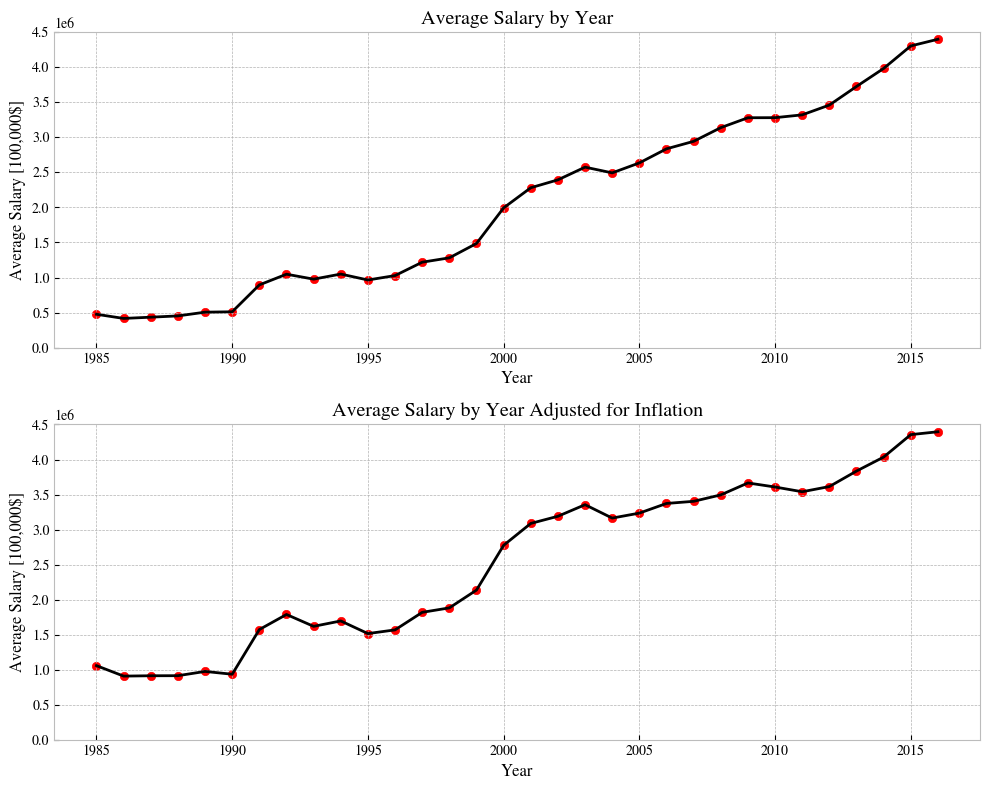

In [19]:
import matplotlib
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.style.use("bmh")

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

ax1, ax2 = axes

ax1.plot(mean_salaries.index, mean_salaries.salary['mean'], color="black")
ax1.scatter(mean_salaries.index, mean_salaries.salary['mean'], color="r")
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Salary [100,000$]")
ax1.set_title("Average Salary by Year")
ax1.set_facecolor("white")
ax1.set_ylim([0, 4500000])

ax2.plot(mean_salaries.index, mean_salaries.adj_salary['mean'], color="black")
ax2.scatter(mean_salaries.index, mean_salaries.adj_salary['mean'], color="r")
ax2.set_xlabel("Year")
ax2.set_ylabel("Average Salary [100,000$]")
ax2.set_title("Average Salary by Year Adjusted for Inflation")
ax2.set_facecolor("white")
ax2.set_ylim([0, 4500000])

plt.tight_layout()
